In [81]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats 
from scipy.stats import pearsonr
import math
import matplotlib.pyplot as plt
from seaborn import regplot

In [82]:
df = pd.read_csv('countries of the world.csv')

In [83]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [84]:
df.shape

(227, 20)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [86]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

As we have a fairly small dataset, it makes sense not to remove null values and instead fill numerical values with the mean value.

In [87]:
df = df.fillna(df.mean())

Rename columns

In [88]:
df.columns = (["country","region","population","area","density","coastline","migration","infant_mortality","gdp","literacy","phones","arable","crops","other","climate","birthrate","deathrate","agriculture","industry","service"])

In [89]:
df.country = df.country.astype('category')
df.region = df.region.astype('category')

remove trailing and leading spaces

In [90]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [91]:
df['region'].value_counts()

SUB-SAHARAN AFRICA      51
LATIN AMER. & CARIB     45
WESTERN EUROPE          28
ASIA (EX. NEAR EAST)    28
OCEANIA                 21
NEAR EAST               16
EASTERN EUROPE          12
C.W. OF IND. STATES     12
NORTHERN AFRICA          6
NORTHERN AMERICA         5
BALTICS                  3
Name: region, dtype: int64

group country and number of regions

In [92]:
region = df.region.value_counts()

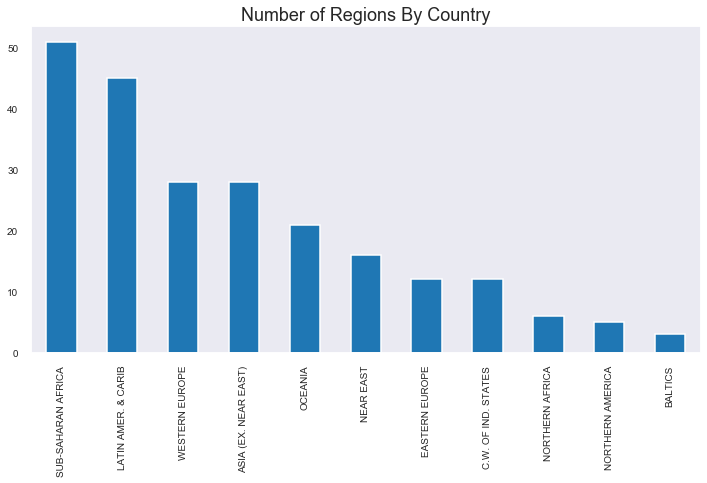

In [93]:
ax = region.plot(kind='bar',figsize = (12,6))
plt.title('Number of Regions By Country')

ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=20)

Let's examine GDP by region

Text(0.5, 1.0, 'GDP By Region')

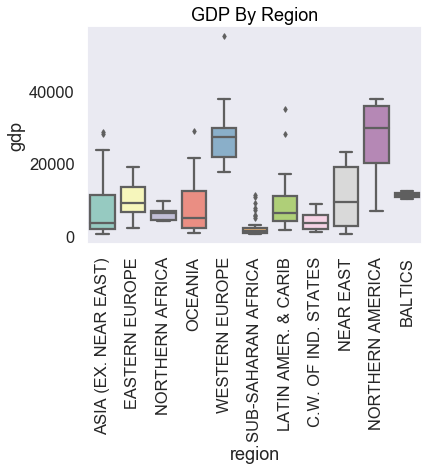

In [94]:
sns.boxplot(x="region",y="gdp",data=df,width=0.8,palette="Set3",fliersize=4)
plt.xticks(rotation=90)
plt.title("GDP By Region",color="black")

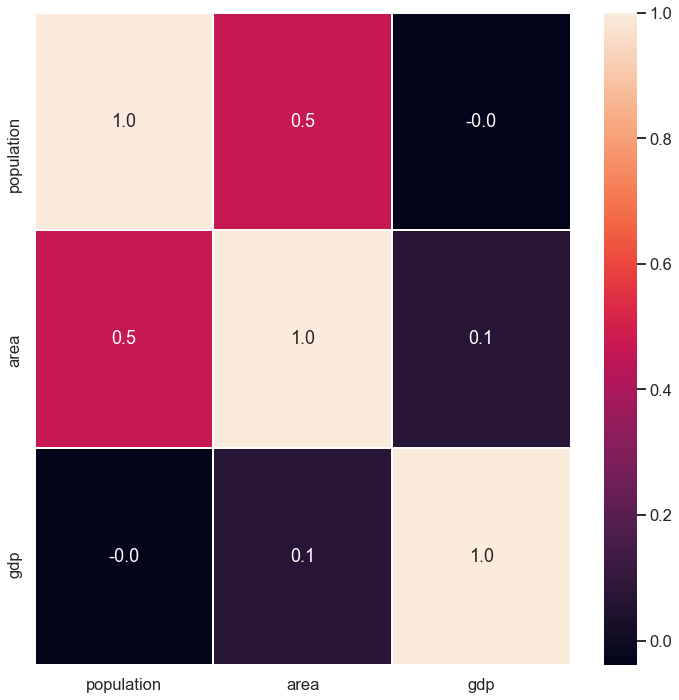

In [95]:

corr = df.corr()
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, linewidths=.8, fmt= '.1f',ax=ax)

In [96]:
df.columns

Index(['country', 'region', 'population', 'area', 'density', 'coastline',
       'migration', 'infant_mortality', 'gdp', 'literacy', 'phones', 'arable',
       'crops', 'other', 'climate', 'birthrate', 'deathrate', 'agriculture',
       'industry', 'service'],
      dtype='object')

clearly area has some sort of correlation with GDP

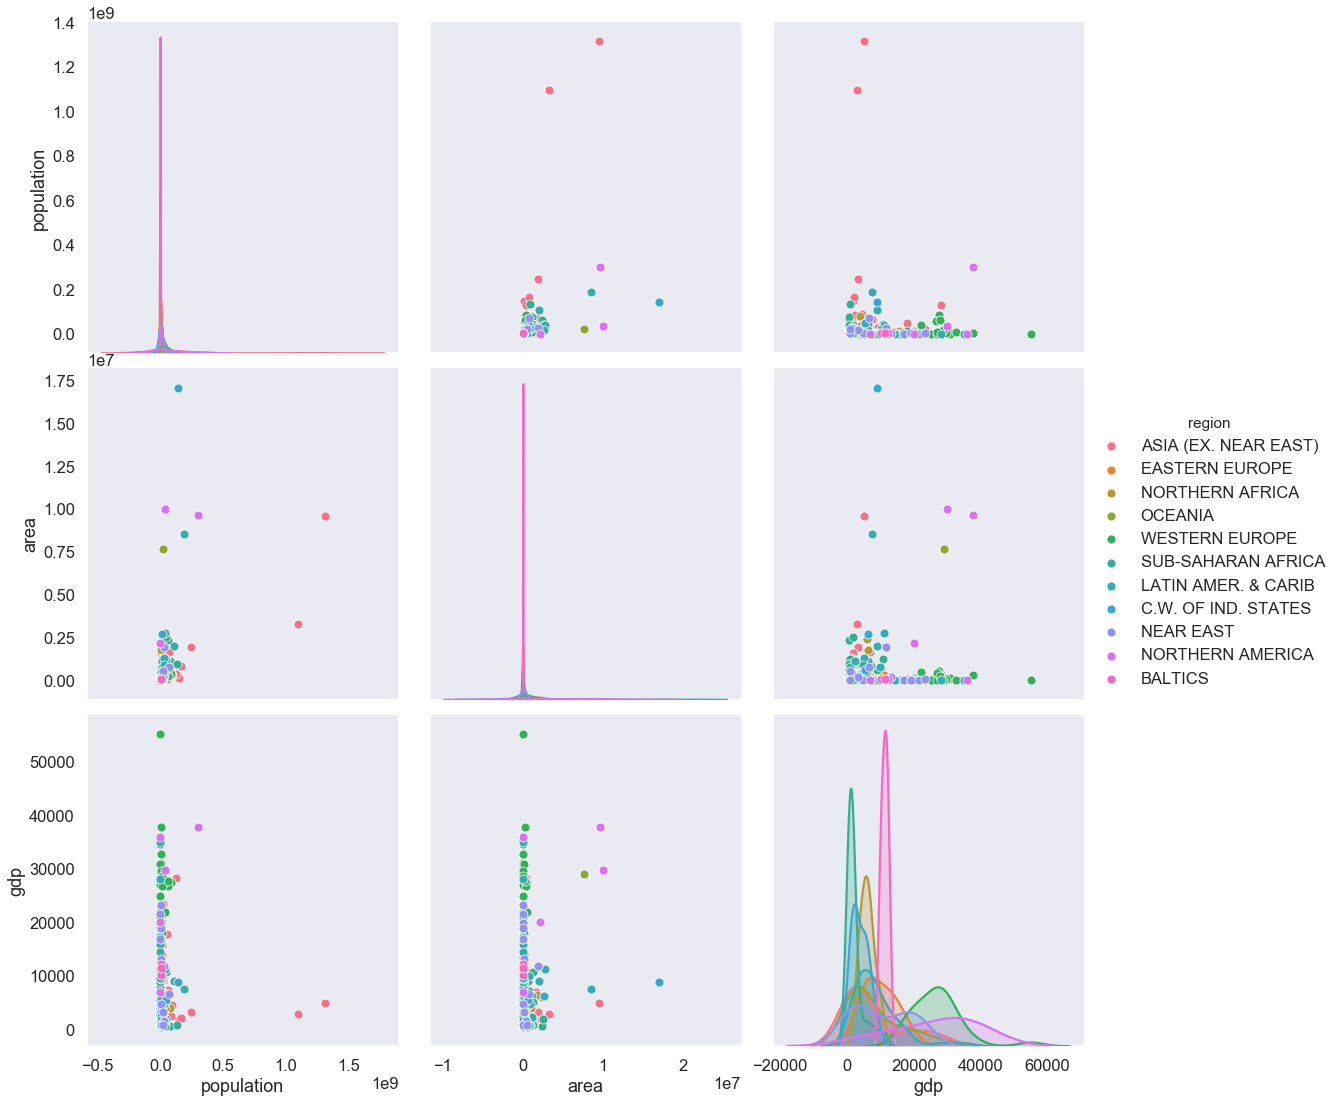

In [97]:
sns.set_style("dark")
sns.pairplot(df, hue='region',height = 5);

Null: There is no relationship between area and GDP.

Alternative: There is a relationship between area and GDP.

Hypothesis 3: There is a relationship between another variable and GDP.

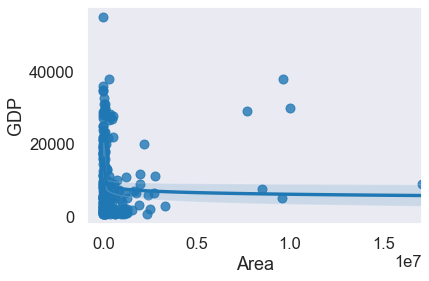

(0.07217948209438932, 0.2788514652326703)


In [106]:
def plt_regression(x, y, data, label_1, label_2):

    reg_plot = regplot(x=x, y=y, fit_reg=True, data=data,logx=True)
    plt.xlabel(label_1)
    plt.ylabel(label_2)
    plt.show()

plt_regression('area', 'gdp', df, 'Area', 'GDP')
print(pearsonr(df['area'], df['gdp']))